In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### data import

In [20]:
# import data
connections = pd.read_csv('connections_princeton.csv.gz', compression='gzip')
neurons = pd.read_csv('neurons.csv.gz', compression='gzip')
connections

,pre_root_id,post_root_id,neuropil,syn_count,nt_type
0,720575940625363947,720575940623224444,ME_L,12,GABA
1,720575940630432382,720575940618518557,ME_L,67,ACH
2,720575940627314521,720575940626337738,ME_L,10,GABA
3,720575940620280405,720575940620204726,ME_L,15,ACH
4,720575940636942447,720575940613789411,LA_L,1,GLUT
...,...,...,...,...,...
5342441,720575940610739918,720575940617129885,PLP_L,5,ACH
5342442,720575940653332385,720575940623905719,CRE_R,2,ACH
5342443,720575940622485887,720575940631031803,ME_R,9,ACH
5342444,720575940620020534,720575940636489140,SMP_L,2,ACH


# df processing

In [31]:
# merge dataframes for nt_type of post-synaptic neurons
connects_merged = pd.merge(connections[['post_root_id', 'neuropil', 'syn_count']], neurons[['root_id', 'nt_type']], left_on='post_root_id', right_on='root_id').drop(columns='root_id')
connects_merged

,post_root_id,neuropil,syn_count,nt_type
0,720575940623224444,ME_L,12,NaN
1,720575940618518557,ME_L,67,ACH
2,720575940626337738,ME_L,10,ACH
3,720575940620204726,ME_L,15,ACH
4,720575940613789411,LA_L,1,ACH
...,...,...,...,...
5342441,720575940617129885,PLP_L,5,GABA
5342442,720575940623905719,CRE_R,2,ACH
5342443,720575940631031803,ME_R,9,NaN
5342444,720575940636489140,SMP_L,2,GABA


In [69]:
connects_merged[connects_merged['neuropil']=='AL_L']

,post_root_id,neuropil,syn_count,nt_type
169331,720575940631448680,AL_L,5,GLUT
169421,720575940625821758,AL_L,6,SER
169436,720575940611379569,AL_L,14,NaN
169458,720575940609269001,AL_L,5,GLUT
169462,720575940613590501,AL_L,12,SER
...,...,...,...,...
5342232,720575940623000858,AL_L,18,GABA
5342247,720575940627927573,AL_L,7,GABA
5342307,720575940623045117,AL_L,2,ACH
5342347,720575940637910106,AL_L,5,ACH


In [70]:
# check: do root ids repeat in a single neuropil, keeping nt_type attached?
check = connects_merged.groupby(['neuropil', 'post_root_id']).size().reset_index(name='count')
check[check['neuropil']=='AL_L'].sort_values(by='count', ascending=False)

,neuropil,post_root_id,count
1368,AL_L,720575940623636701,1019
2409,AL_L,720575940632795532,976
2382,AL_L,720575940632403986,959
257,AL_L,720575940611379569,951
1282,AL_L,720575940623000858,936
...,...,...,...
1612,AL_L,720575940625977870,1
1611,AL_L,720575940625972624,1
1605,AL_L,720575940625919434,1
1602,AL_L,720575940625884541,1


We can see a pretty big difference before and after collapsing on neurons by neuropil

In [32]:
connections[connections['nt_type']=='GABA'].groupby('nt_type').size()

nt_type
GABA    1172932
dtype: int64

In [72]:
# get the proportion of neurons of a nt_type in each neuropil 
def get_proportion(df):
    return (df.groupby('neuropil').size() / df.groupby('neuropil').size().sum())*100


In [73]:
prop_test = get_proportion(check[check['neuropil']=='AL_L'].sort_values(by='count', ascending=False))
prop_test

neuropil
AL_L    100.0
dtype: float64

Processing nt_type: ACH
       neuropil        post_root_id  count
0          AL_L  720575940603231916    109
1          AL_L  720575940603430112      2
2          AL_L  720575940603659488      9
3          AL_L  720575940603820716     30
4          AL_L  720575940603871404      1
...         ...                 ...    ...
235200    WED_R  720575940659009409      5
235201    WED_R  720575940659264385      2
235202    WED_R  720575940660235649      1
235203    WED_R  720575940660236673      3
235204    WED_R  720575940661114753      1

[235205 rows x 3 columns]
       neuropil        post_root_id  count
0          AL_L  720575940603231916      1
1          AL_L  720575940603430112      1
2          AL_L  720575940603659488      1
3          AL_L  720575940603820716      1
4          AL_L  720575940603871404      1
...         ...                 ...    ...
235200    WED_R  720575940659009409      1
235201    WED_R  720575940659264385      1
235202    WED_R  720575940660235649      1
235

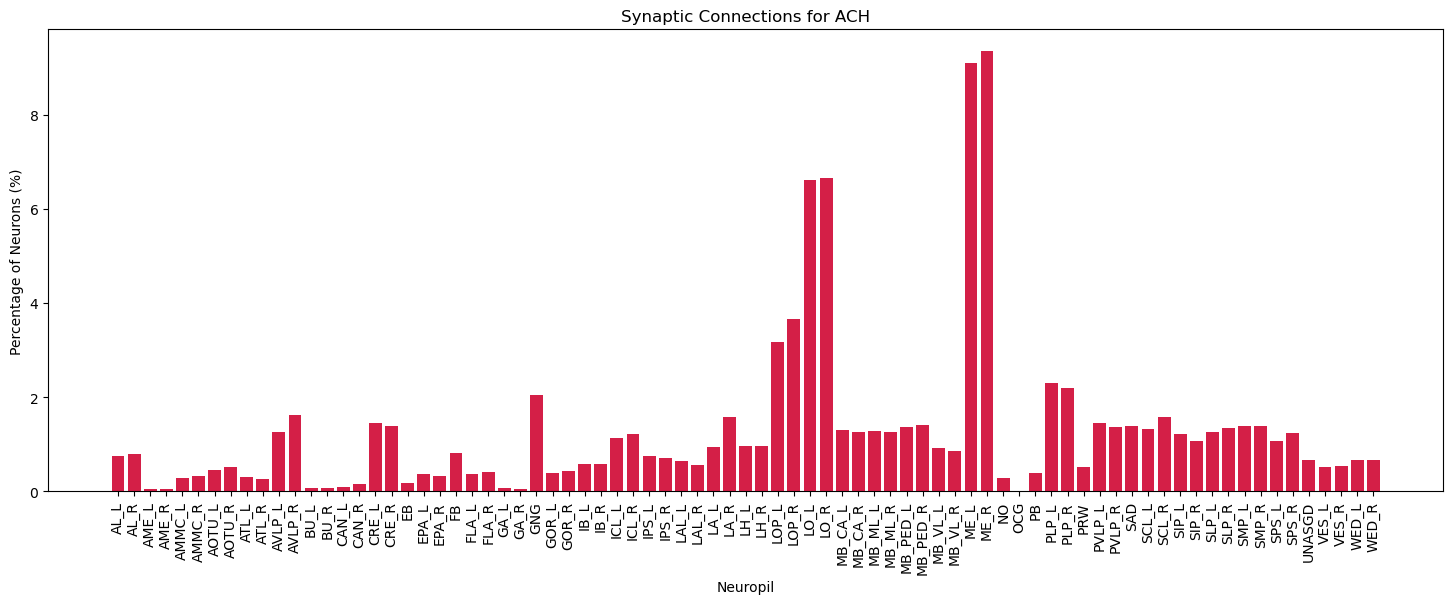

Processing nt_type: GLUT
      neuropil        post_root_id  count
0         AL_L  720575940605068390      1
1         AL_L  720575940605101758     14
2         AL_L  720575940606267659     43
3         AL_L  720575940606756785      1
4         AL_L  720575940606762953      1
...        ...                 ...    ...
56144    WED_R  720575940653028257     12
56145    WED_R  720575940653310198      9
56146    WED_R  720575940653344673     15
56147    WED_R  720575940654310049     17
56148    WED_R  720575940658654593      9

[56149 rows x 3 columns]
      neuropil        post_root_id  count
0         AL_L  720575940605068390      1
1         AL_L  720575940605101758      1
2         AL_L  720575940606267659      1
3         AL_L  720575940606756785      1
4         AL_L  720575940606762953      1
...        ...                 ...    ...
56144    WED_R  720575940653028257      1
56145    WED_R  720575940653310198      1
56146    WED_R  720575940653344673      1
56147    WED_R  720575940

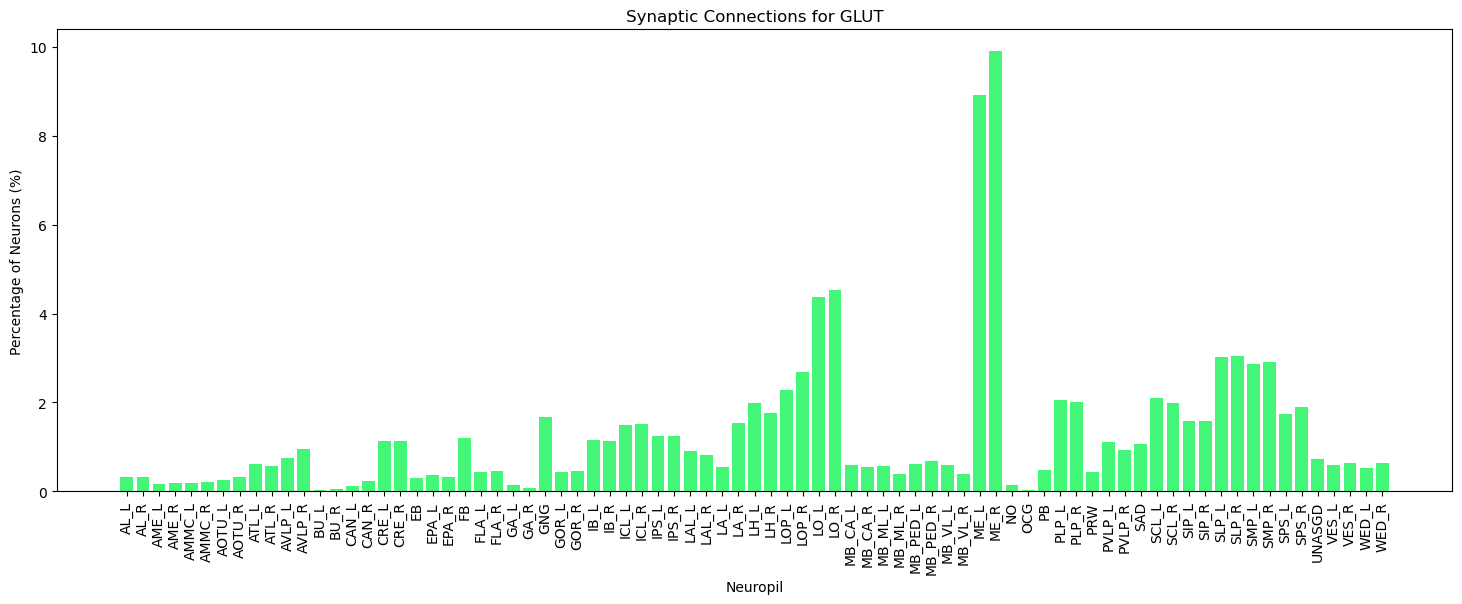

Processing nt_type: GABA
      neuropil        post_root_id  count
0         AL_L  720575940602380768      1
1         AL_L  720575940603514141      1
2         AL_L  720575940604201830      5
3         AL_L  720575940604690278      6
4         AL_L  720575940605028017      7
...        ...                 ...    ...
42356    WED_R  720575940655782305      7
42357    WED_R  720575940659709313      2
42358    WED_R  720575940660051073      7
42359    WED_R  720575940660507009      7
42360    WED_R  720575940661321857      3

[42361 rows x 3 columns]
      neuropil        post_root_id  count
0         AL_L  720575940602380768      1
1         AL_L  720575940603514141      1
2         AL_L  720575940604201830      1
3         AL_L  720575940604690278      1
4         AL_L  720575940605028017      1
...        ...                 ...    ...
42356    WED_R  720575940655782305      1
42357    WED_R  720575940659709313      1
42358    WED_R  720575940660051073      1
42359    WED_R  720575940

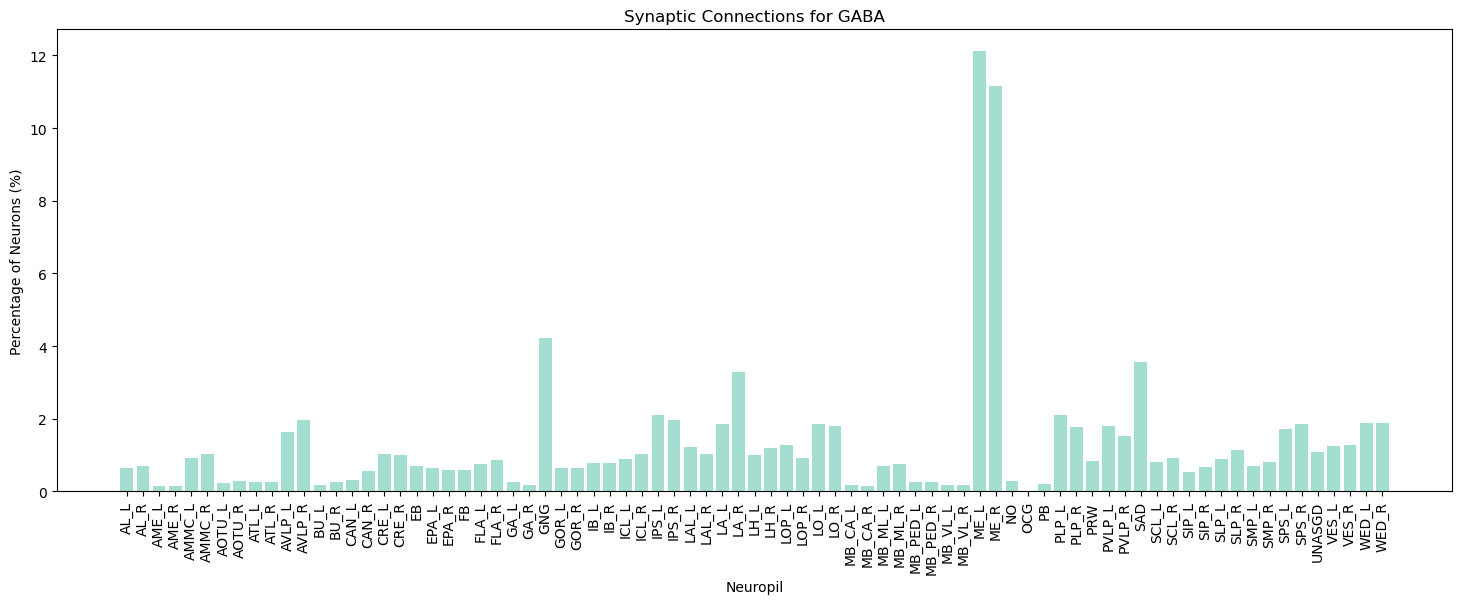

Processing nt_type: SER
     neuropil        post_root_id  count
0        AL_L  720575940603828704      1
1        AL_L  720575940605608806      1
2        AL_L  720575940605834626      4
3        AL_L  720575940605915872      3
4        AL_L  720575940606123209      1
...       ...                 ...    ...
2240    WED_R  720575940628731140      5
2241    WED_R  720575940629413962      1
2242    WED_R  720575940631003589      4
2243    WED_R  720575940631270162      1
2244    WED_R  720575940632934751     15

[2245 rows x 3 columns]
     neuropil        post_root_id  count
0        AL_L  720575940603828704      1
1        AL_L  720575940605608806      1
2        AL_L  720575940605834626      1
3        AL_L  720575940605915872      1
4        AL_L  720575940606123209      1
...       ...                 ...    ...
2240    WED_R  720575940628731140      1
2241    WED_R  720575940629413962      1
2242    WED_R  720575940631003589      1
2243    WED_R  720575940631270162      1
2244    

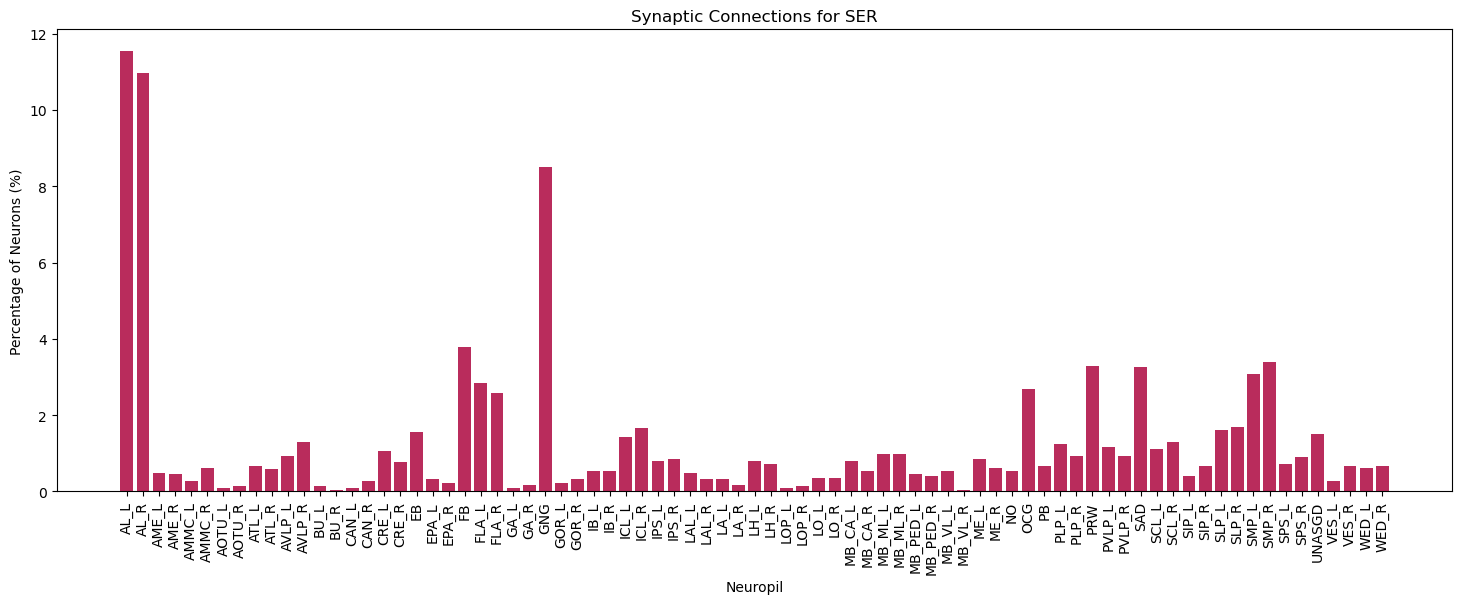

Processing nt_type: DA
     neuropil        post_root_id  count
0        AL_L  720575940608176452      2
1        AL_L  720575940610357602      6
2        AL_L  720575940614342038      1
3        AL_L  720575940614660519      4
4        AL_L  720575940615607207     19
...       ...                 ...    ...
3744    WED_R  720575940635492276     38
3745    WED_R  720575940635618711      7
3746    WED_R  720575940637293687      2
3747    WED_R  720575940637656974      2
3748    WED_R  720575940640002256     11

[3749 rows x 3 columns]
     neuropil        post_root_id  count
0        AL_L  720575940608176452      1
1        AL_L  720575940610357602      1
2        AL_L  720575940614342038      1
3        AL_L  720575940614660519      1
4        AL_L  720575940615607207      1
...       ...                 ...    ...
3744    WED_R  720575940635492276      1
3745    WED_R  720575940635618711      1
3746    WED_R  720575940637293687      1
3747    WED_R  720575940637656974      1
3748    W

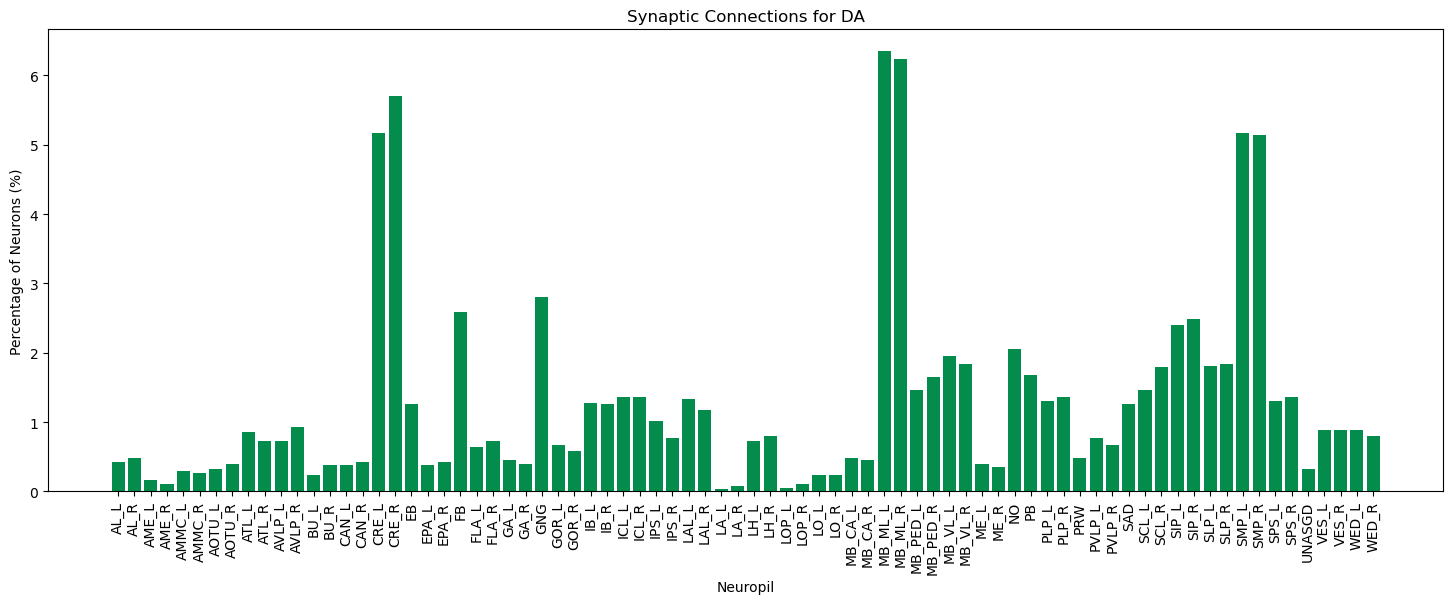

Processing nt_type: OCT
     neuropil        post_root_id  count
0        AL_L  720575940613635737      4
1        AL_L  720575940616984588      2
2        AL_L  720575940623164515      1
3        AL_L  720575940625264457      1
4        AL_L  720575940626051514      1
...       ...                 ...    ...
1055    WED_R  720575940631282194     14
1056    WED_R  720575940633631396     44
1057    WED_R  720575940636479668     11
1058    WED_R  720575940638720233      7
1059    WED_R  720575940644751652     20

[1060 rows x 3 columns]
     neuropil        post_root_id  count
0        AL_L  720575940613635737      1
1        AL_L  720575940616984588      1
2        AL_L  720575940623164515      1
3        AL_L  720575940625264457      1
4        AL_L  720575940626051514      1
...       ...                 ...    ...
1055    WED_R  720575940631282194      1
1056    WED_R  720575940633631396      1
1057    WED_R  720575940636479668      1
1058    WED_R  720575940638720233      1
1059    

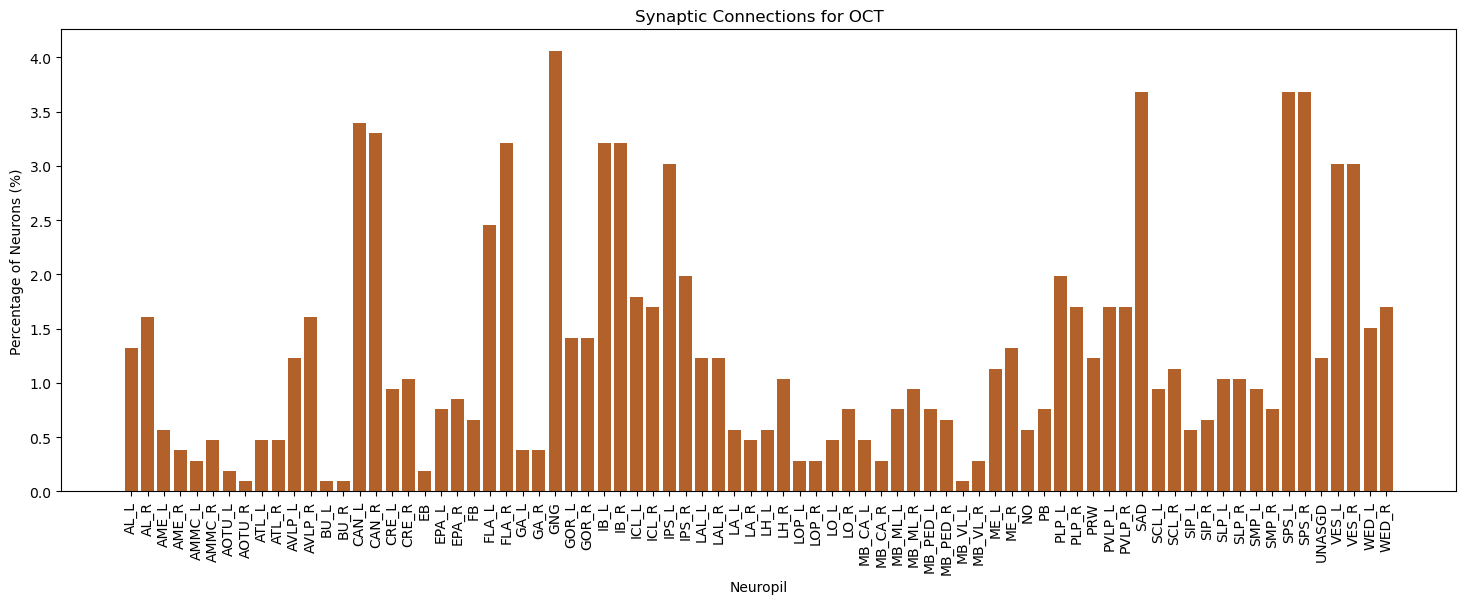

In [75]:
# create a for loop for this issue
for nt_type in connects_merged['nt_type'].dropna().unique():
    print(f'Processing nt_type: {nt_type}')
    # isolate a single nt_type
    connects_nt = connects_merged[connects_merged['nt_type'] == nt_type]
    # collapse onto unqiue post_root_id and neuropil
    connects_nt = connects_nt.groupby(['neuropil', 'post_root_id']).size().reset_index(name='count')
    connects_nt['count'] = 1

    # check counts for each post_root_id in neuropil
    

    plt.figure(figsize=(18, 6))
    proportions = get_proportion(connects_nt)
    
    # plot proportions
    plt.bar(proportions.index, proportions.values, color=np.random.rand(3,))
    plt.title(f'Synaptic Connections for {nt_type}')
    plt.xlabel('Neuropil')
    plt.ylabel('Percentage of Neurons (%)') 
    plt.xticks(rotation=90)
    #plt.legend()
    #plt.grid(True)
    plt.show()

In [42]:
# use function to get proportions for GABA
proportions_gaba = get_proportion(connects_merged, 'GABA')
proportions_gaba

neuropil
AL_L      0.841406
AL_R      0.643766
AME_L     0.031392
AME_R     0.029712
AMMC_L    0.690015
            ...   
UNASGD    0.056418
VES_L     0.889777
VES_R     0.885621
WED_L     1.075125
WED_R     1.115714
Length: 79, dtype: float64

Text(0, 0.5, 'Percentage of Neurons (%)')

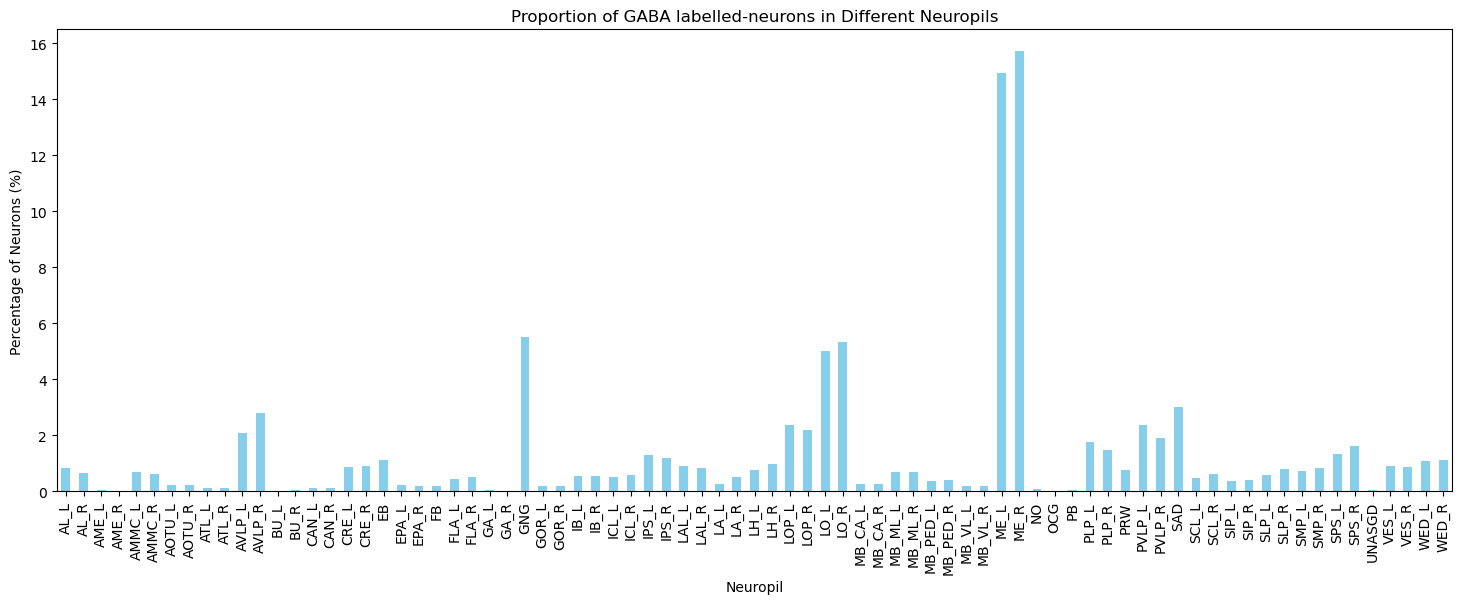

In [62]:
# plot this data, bar plot with neuropil on y-axis and syn_count on x-axis, just GABA
plt.figure(figsize=(18, 6))
proportions_gaba.plot(kind='bar', color='skyblue')
plt.title('Proportion of GABA labelled-neurons in Different Neuropils')
plt.xlabel('Neuropil' )
plt.ylabel('Percentage of Neurons (%)')
#plt.xticks(rotation=45)

Text(0, 0.5, 'Percentage of Synapses (%)')

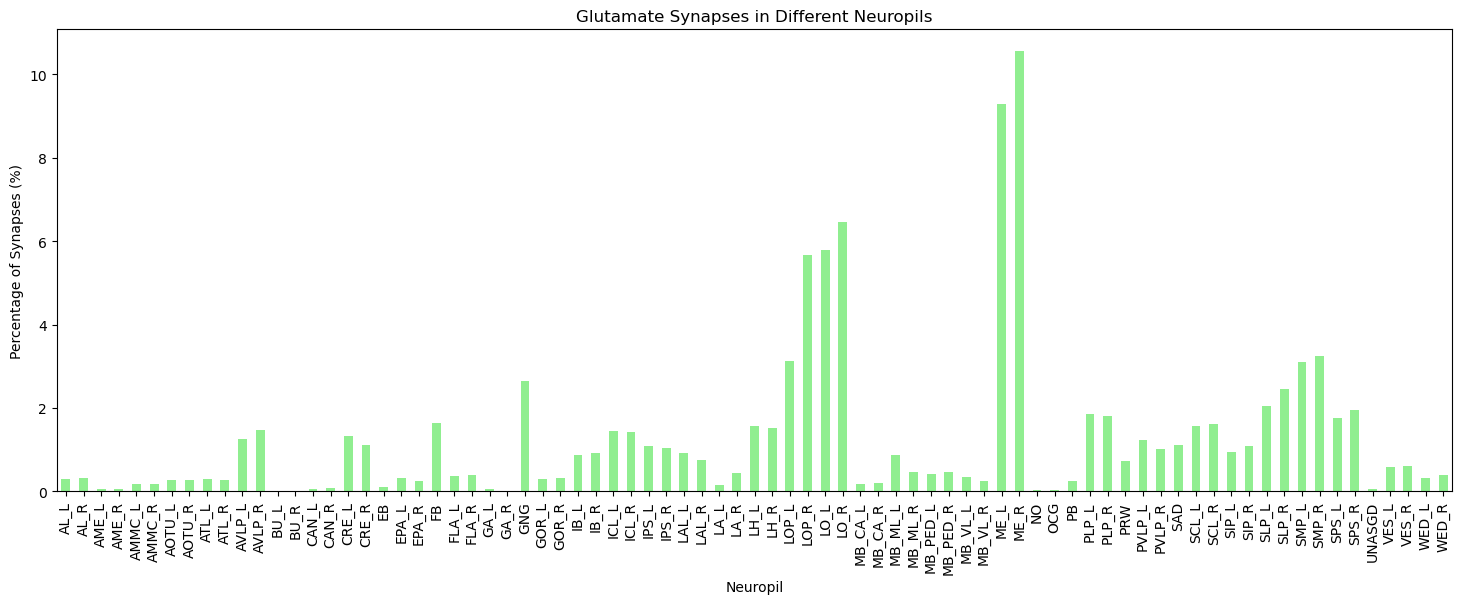

In [46]:
# for glutamate, use the same function
proportions_glutamate = get_proportion(connects_merged, 'GLUT')
# plot this data, bar plot with neuropil on y-axis and syn_count on x-axis, just glutamate
plt.figure(figsize=(18, 6))
proportions_glutamate.plot(kind='bar', color='lightgreen')
plt.title('Glutamate Synapses in Different Neuropils')
plt.xlabel('Neuropil')
plt.ylabel('Percentage of Synapses (%)')
